## MOFAtalk

In [3]:
import os

In [4]:
data_dir = os.path.join('..', '..', 'data', 'kidney_injury')

In [5]:
# columns of interest
sample_key = "ident"
groupby = "cell_type"
condition_key = "Group"

## Setup Environment

In [6]:
import numpy as np
import pandas as pd

import scanpy as sc

In [7]:
import mofax as mofa
import muon as mu
import decoupler as dc

/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import liana as li
import plotnine as p9

In [9]:
li.__version__

'0.1.9'

Load object

In [10]:
adata = sc.read_h5ad(os.path.join(data_dir, "aki_processed.h5ad"))

In [11]:
adata.obs.sort_values("cell_type")

,orig.ident,nCount_RNA,nFeature_RNA,Group,Replicates,cell_state,ident,cell_type,full_name,n_genes,keep_sum,keep_min,keep_celltype
IRI12h2_CAACTAGGTTTACTCT,IRI12h2,1428.0,532,12hours,2,CNT,IRI12h2,CNT,Connecting tubule,532,24,True,True
IRIsham1b2_CACAGGCTCAAGGTAA,IRIsham1b2,1331.0,579,Control,1_2,CNT,IRIsham1b2,CNT,Connecting tubule,579,24,True,True
IRI14d1b2_ATGGGAGTCTGCGGCA,IRI14d1b2,1279.0,535,14days,1_2,CNT,IRI14d1b2,CNT,Connecting tubule,535,24,True,True
IRIsham2_GACAGAGTCAACCAAC,IRIsham2,1042.0,532,Control,2,CNT,IRIsham2,CNT,Connecting tubule,532,24,True,True
IRI4h3_AAGGTTCTCCAATGGT,IRI4h3,1446.0,553,4hours,3,CNT,IRI4h3,CNT,Connecting tubule,553,24,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IRI6w3_ATCTGCCGTGGTGTAG,IRI6w3,1120.0,577,6weeks,3,Uro,IRI6w3,Uro,Urothelial cell,577,23,True,True
IRIsham1b1_CGTCTACAGACGCTTT,IRIsham1b1,1218.0,718,Control,1_1,Uro,IRIsham1b1,Uro,Urothelial cell,718,23,True,True
IRI2d1b1_CGTTAGAAGCTCCTTC,IRI2d1b1,1560.0,667,2days,1_1,Uro,IRI2d1b1,Uro,Urothelial cell,667,23,True,True
IRIsham1b2_CGCTTCATCCTTGACC,IRIsham1b2,1794.0,776,Control,1_2,Uro,IRIsham1b2,Uro,Urothelial cell,776,23,True,True


In [12]:
adata.obs[groupby].value_counts()

PT         50159
MTAL       13750
CTAL        9904
EC          9660
PC          8407
DCT         7500
DTL-ATL     4924
CNT         4578
Fib         4350
MO          3036
ICA         2920
ICB         1974
DCT-CNT     1682
Uro         1167
Pod          771
Tcell        617
PEC          518
Per          396
Name: cell_type, dtype: int64

In [13]:
adata.uns.keys()

dict_keys(['X_name', 'cell_type_colors', 'liana_res', 'log1p', 'neighbors', 'pca', 'umap'])

## Run LIANA

In [ ]:
li.method.rank_aggregate.by_sample(adata,
                                   groupby=groupby,
                                   sample_key=sample_key,
                                   resource_name='mouseconsensus',
                                   use_raw=False,
                                   verbose=True,
                                   n_perms=None,
                                   return_all_lrs=False
                                   )

In [ ]:
adata.write_h5ad(os.path.join(data_dir, "aki_processed.h5ad"))

In [11]:
adata.uns['liana_res']['ident'].nunique()

24

## Run MOFA

In [14]:
score_key = 'magnitude_rank'

In [15]:
mdata = li.multi.lrs_to_views(adata,
                              sample_key=sample_key,
                              score_key=score_key,
                              obs_keys=[condition_key], # add those to mdata.obs
                              lr_prop = 0.25, # minimum required proportion of samples to keep an LR
                              lrs_per_sample = 15, # minimum number of interactions to keep a sample in a specific view
                              lrs_per_view = 25, # minimum number of interactions to keep a view
                              samples_per_view = 5, # minimum number of samples to keep a view
                              min_variance = 0, # minimum variance to keep an interaction
                              lr_fill = np.nan, # fill missing LR values across samples with this
                              verbose=True
                              )

100%|██████████| 159/159 [00:01<00:00, 98.37it/s] 


In [16]:
mu.tl.mofa(mdata,
           use_obs='union',
           convergence_mode='medium',
           outfile='models/mofatalk.h5ad',
           n_factors=5,
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='PEC&CTAL' group='group1' with N=24 samples and D=17 features...
Loaded view='PEC&MTAL' group='group1' with N=24 samples and D=29 features...
Loaded view='PEC&Per' group='group1' with N=24 samples and D=47 features...
Loaded view='PEC&PC' group='group1' with N=24 samples and D=22 features...
Loaded view='PEC&ICB' group='group1' with N=24 samples and D=18 features...


In [17]:
# obtain factor scores
factor_scores = li.multi.get_factor_scores(mdata, obsm_key='X_mofa')
# re-order Groups
factor_scores['Group'] = factor_scores['Group'].astype('category')
factor_scores['Group'] = factor_scores['Group'].cat.reorder_categories([ '4hours','12hours',  '2days', '14days', '6weeks', 'Control'])
factor_scores.head()

,ident,Factor1,Factor2,Factor3,Factor4,Factor5,Group
0,IRI12h1b1,0.212758,-0.018611,-0.015426,-0.009003,0.002567,12hours
1,IRI12h1b2,0.205543,-0.019785,-0.014341,-0.009589,0.002848,12hours
2,IRI12h2,0.212398,-0.017152,-0.013336,-0.009206,0.002272,12hours
3,IRI12h3,0.199433,-0.019083,-0.015480,-0.008798,0.002676,12hours
4,IRI14d1b1,-0.106828,-0.020529,-0.014913,-0.010607,0.001289,14days


UMAP

In [18]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata)

sc.tl.umap(mdata, min_dist=.2, spread=1., random_state=10)

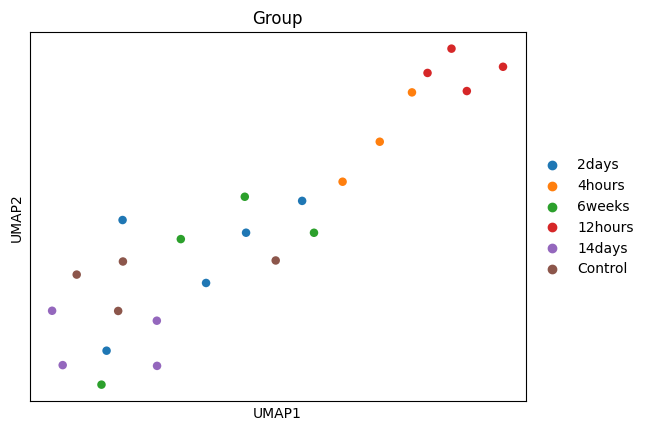

In [19]:
sc.pl.umap(mdata, color="Group", size=150)

In [20]:

# Kruskal Wallis test
from scipy.stats import kruskal

In [21]:
# Extract the values for each group
groups = []
for group_name, group_data in factor_scores.groupby('Group'):
    groups.append(group_data['Factor1'].values)

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

# Print the test results
print("Kruskal-Wallis Test")
print("Statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis Test
Statistic: 17.310000000000002
P-value: 0.00394789398713399


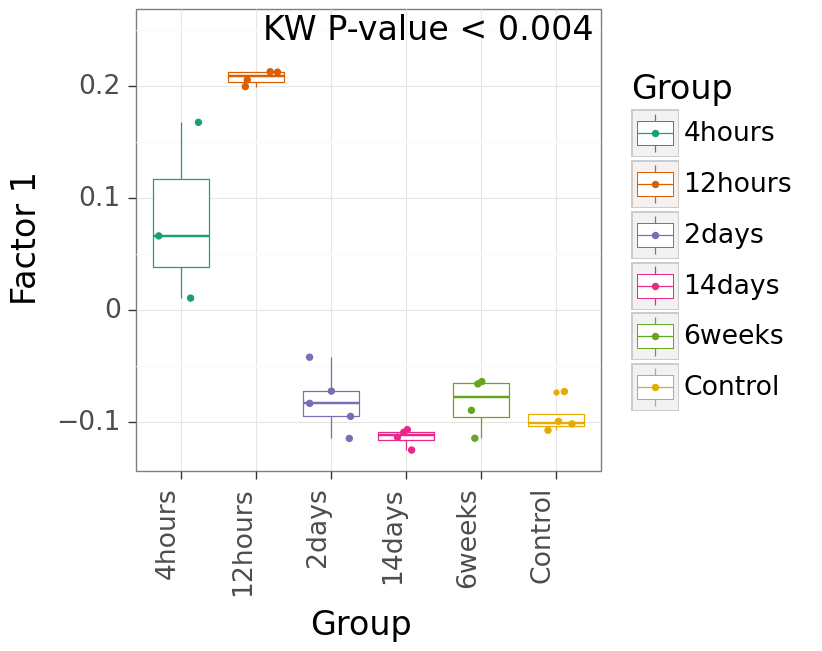

<ggplot: (8735170653890)>

In [22]:
# scatterplot
(p9.ggplot(factor_scores) +
 p9.aes(x='Group', colour='Group', y='Factor1') +
 p9.geom_boxplot() +
 p9.geom_jitter(size=2, width=0.3) +
 p9.theme_bw(base_size=24) +
 p9.theme(figure_size=(6, 6)) + 
 p9.labs(x='Group', y='Factor 1') +
 # rotate x-axis labels
 p9.theme(axis_text_x=p9.element_text(angle=90, hjust=1)) +
 # Dark2 set 
 p9.scale_color_brewer(type='qual', palette='Dark2') +
 # add p-value to top-right
 p9.annotate('text', x=4.3, y=0.25, label=f'KW P-value < {np.round(p_value, decimals=3)}', size=24)
 
 )

Plot R-sq

In [23]:
model = mofa.mofa_model("models/mofatalk.h5ad")
model

MOFA+ model: mofatalk.h5ad
Samples (cells): 24
Features: 2699
Groups: group1 (24)
Views: CNT&DTL-ATL (20), CNT&Fib (26), CNT&PEC (34), CNT&PT (18), CNT&Per (17), CNT&Pod (24), CNT&Uro (29), CTAL&DTL-ATL (18), CTAL&Fib (22), CTAL&PEC (27), CTAL&PT (16), CTAL&Per (15), CTAL&Pod (17), CTAL&Uro (25), DCT&DTL-ATL (21), DCT&Fib (22), DCT&PEC (25), DCT&PT (14), DCT&Per (12), DCT&Pod (21), DCT&Uro (24), DCT-CNT&Fib (25), DCT-CNT&PEC (28), DCT-CNT&Pod (17), DCT-CNT&Uro (32), DTL-ATL&DTL-ATL (18), DTL-ATL&Fib (23), DTL-ATL&PEC (32), DTL-ATL&PT (17), DTL-ATL&Per (23), DTL-ATL&Pod (23), DTL-ATL&Uro (31), EC&Fib (13), EC&PEC (9), EC&Per (6), EC&Pod (15), EC&Uro (15), Fib&DCT-CNT (14), Fib&DTL-ATL (27), Fib&Fib (42), Fib&MTAL (17), Fib&PEC (44), Fib&PT (25), Fib&Per (33), Fib&Pod (40), Fib&Uro (49), ICA&Fib (15), ICA&Pod (15), ICA&Uro (17), ICB&Fib (21), ICB&PEC (24), ICB&Pod (15), ICB&Uro (24), MTAL&DTL-ATL (15), MTAL&Fib (26), MTAL&PEC (19), MTAL&PT (17), MTAL&Per (15), MTAL&Uro (23), PC&DTL-ATL (

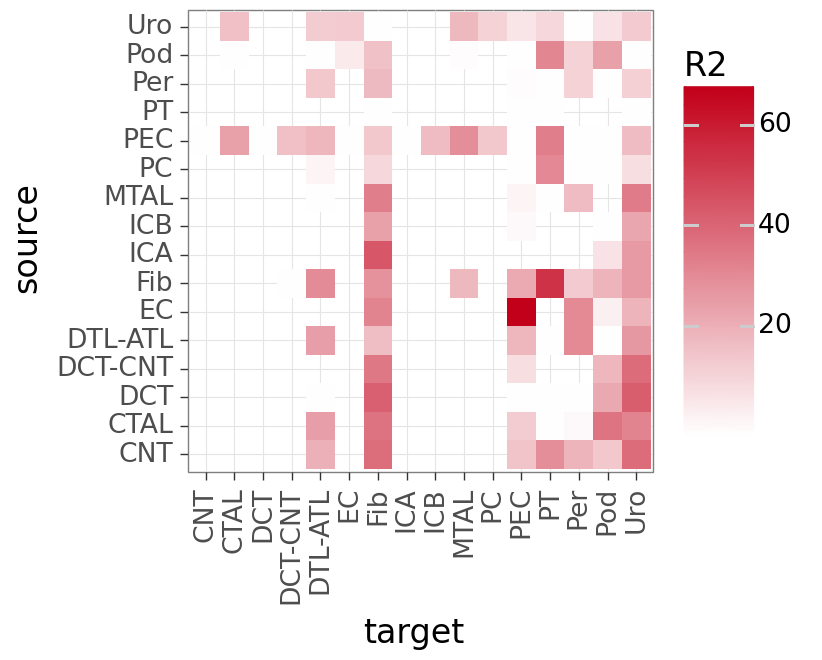

<ggplot: (8735171251594)>

In [24]:
# get variance explained by view and factor
rsq = model.get_r2()
factor1_rsq = rsq[rsq['Factor']=='Factor1']
# separate view column
factor1_rsq[['source', 'target']] = factor1_rsq['View'].str.split('&', 1, expand=True)

(p9.ggplot(factor1_rsq.reset_index()) +
 p9.aes(x='target', y='source') +
 p9.geom_tile(p9.aes(fill='R2')) +
 p9.scale_fill_gradient2(low='white', high='#c20019') +
 p9.theme_bw(base_size=24) +
 # rotate X axis
 p9.theme(axis_text_x=p9.element_text(angle=90), figure_size=(6, 6))
 )

In [37]:
sources = np.unique(factor1_rsq.sort_values("R2", ascending=False)['source'].head(10).values)
sources

array(['CNT', 'CTAL', 'DCT', 'DCT-CNT', 'EC', 'Fib', 'ICA'], dtype=object)

In [38]:
targets = np.unique(factor1_rsq.sort_values("R2", ascending=False)['target'].head(10).values)
targets

array(['Fib', 'PEC', 'PT', 'Pod', 'Uro'], dtype=object)

Average R2 per source & target

In [27]:
# mean R2 and std for factor1
factor1_rsq.groupby('target').agg({'R2': ['mean', 'std']}).sort_values(('R2', 'mean'), ascending=False).head(10)

R2           
              mean        std
target                       
Fib      23.996381  13.808916
Uro      22.183097  12.946500
ICB      17.107415        NaN
MTAL     16.630942  11.757348
PT       15.584820  18.597953
CTAL     13.667581  12.502867
DTL-ATL  13.531879  11.188478
PC       12.933593   1.650043
Per      11.331436  11.278984
Pod      10.949058  11.568095

In [28]:
# mean R2 and std for factor1
factor1_rsq.groupby('source').agg({'R2': ['mean', 'std']}).sort_values(('R2', 'mean'), ascending=False).head(10)

R2           
              mean        std
source                       
EC       30.080890  22.852060
ICA      25.527268  17.924832
DCT-CNT  24.857433  13.816847
CNT      24.767081  10.019861
Fib      23.189205  14.110177
CTAL     20.555778  15.498901
DTL-ATL  16.793770  12.276723
DCT      15.011266  19.759644
MTAL     14.486484  15.934848
ICB      12.231689  13.179260

In [29]:
factor1_rsq['R2'].mean()

14.964781224364726

In [30]:
factor1_rsq.sort_values("R2", ascending=False).head(10)

,Factor,View,Group,R2,source,target
105,Factor1,EC&PEC,group1,65.830353,EC,PEC
43,Factor1,Fib&PT,group1,52.517755,Fib,PT
35,Factor1,ICA&Fib,group1,43.223214,ICA,Fib
34,Factor1,DCT&Uro,group1,41.600140,DCT,Uro
88,Factor1,DCT&Fib,group1,41.113374,DCT,Fib
60,Factor1,CNT&Uro,group1,37.973097,CNT,Uro
40,Factor1,DCT-CNT&Uro,group1,37.876830,DCT-CNT,Uro
73,Factor1,CNT&Fib,group1,37.323708,CNT,Fib
45,Factor1,CTAL&Fib,group1,36.225895,CTAL,Fib
14,Factor1,CTAL&Pod,group1,35.635192,CTAL,Pod


In [31]:
adata.obs[[groupby, "full_name"]].drop_duplicates()

,cell_type,full_name
IRI4h1_AAACCTGAGATCTGCT,CTAL,Thick ascending limb of loop of Henle
IRI4h1_AAACCTGAGATTACCC,PT,Proximal tubule
IRI4h1_AAACCTGAGTGTTAGA,EC,Epithelial cells
IRI4h1_AAACCTGCACCAACCG,DCT,Distal convoluted tubule
IRI4h1_AAACCTGCAGCCTGTG,MTAL,medullary thick ascending limb
IRI4h1_AAACCTGCAGGGAGAG,ICA,Intercalated cell of collecting duct
IRI4h1_AAACCTGGTAGCGCTC,Fib,Fibroblast
IRI4h1_AAACCTGTCGTCGTTC,DCT-CNT,DCT-CNT
IRI4h1_AAACGGGAGCATGGCA,MO,Macrophages
IRI4h1_AAACGGGGTGCAACGA,PC,Principal cells


In [32]:
variable_loadings =  li.multi.get_variable_loadings(mdata,
                                                    view_separator=':',
                                                    pair_separator="&",
                                                    variable_separator="^") # get loadings for factor 1
variable_loadings.head()
variable_loadings['size'] = 3

In [33]:
# convert to abs to order
variable_loadings['abs_F1'] = np.abs(variable_loadings['Factor1'])

In [34]:
variable_loadings

,ligand_complex,receptor_complex,source,target,Factor1,Factor2,Factor3,Factor4,Factor5,size,abs_F1
1827,Slit2,Robo2,CNT,Fib,-3.171660e+00,2.232469e-01,2.771807e-02,2.575472e-01,5.480457e-03,3,3.171660e+00
2189,Slit2,Robo2,DCT,Fib,-3.145700e+00,9.944637e-01,2.801997e-02,3.552442e-01,-3.127553e-03,3,3.145700e+00
1015,Slit2,Robo1,DCT-CNT,Uro,-3.137715e+00,-1.707674e+00,2.484156e-02,1.329919e-01,-2.035385e-02,3,3.137715e+00
880,Slit2,Robo1,DCT,Uro,-3.065370e+00,-3.426198e+00,5.316154e-02,-1.544281e-01,-4.007918e-01,3,3.065370e+00
1517,Slit2,Robo1,CNT,Uro,-3.063561e+00,-2.986251e+00,1.262222e-01,-2.157707e-02,-2.040984e-03,3,3.063561e+00
...,...,...,...,...,...,...,...,...,...,...,...
105,Ncam1,Fgfr2,PEC,PC,1.760351e-08,-7.865487e-07,4.785977e-07,2.283598e-06,2.165554e-04,3,1.760351e-08
34,Ncam1,Fgfr2,PEC,MTAL,1.297025e-08,5.434666e-08,4.216069e-07,1.393479e-07,2.281348e-06,3,1.297025e-08
142,Ncam1,Fgfr2,PEC,CNT,-5.904578e-09,2.390934e-09,-3.833425e-10,-1.726687e-09,3.687514e-09,3,5.904578e-09
380,Ncam1,Fgfr2,PEC,ICA,-3.824532e-09,3.803731e-09,4.252819e-09,-6.738662e-09,1.073922e-07,3,3.824532e-09


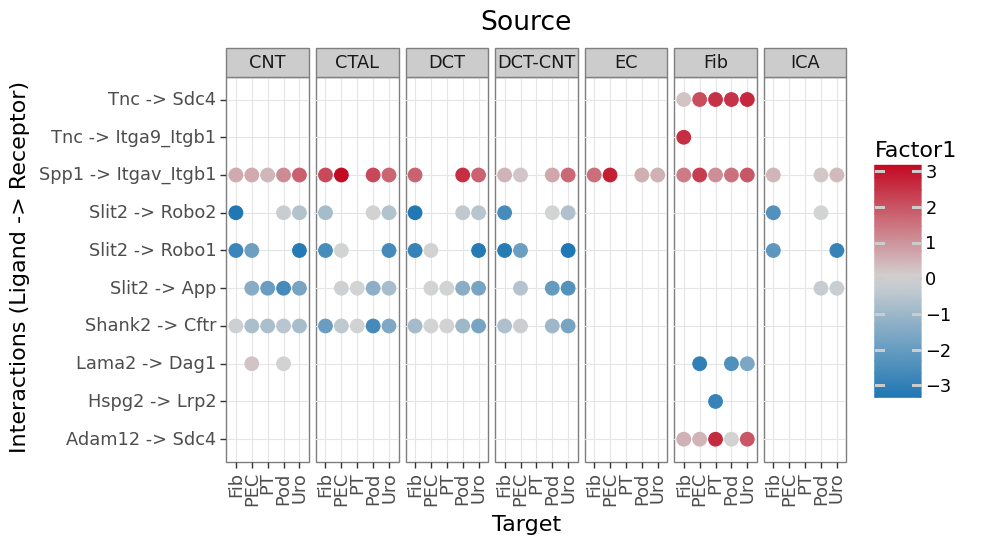

<ggplot: (8735168450290)>

In [36]:
my_plot = li.pl.dotplot(liana_res = variable_loadings,
                        size='size',
                        colour='Factor1',
                        orderby='abs_F1',
                        top_n=10,
                        source_labels=sources,
                        target_labels=targets,
                        orderby_ascending=False,
                        size_range=(0.1, 5),
                        figure_size=(6, 8)
                        )
# change colour, with mid as white
(my_plot + 
 p9.scale_color_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') + 
 p9.theme_bw(base_size=16) +
 p9.theme(figure_size=(8, 5)) +
p9.theme(axis_text_x=p9.element_text(angle=90)) +
 # remove size from legend
 p9.guides(size=False)
)

Pathway enrichment

In [33]:
lr_loadings =  li.multi.get_variable_loadings(mdata,
                                              view_separator=':',
                                              )
lr_loadings.set_index('variable', inplace=True)

In [34]:
lr_loadings.to_csv(os.path.join(data_dir, 'lr_loadings.csv'))

In [35]:
# load PROGENy pathways
net = dc.get_progeny(organism='Mus musculus', top=5000)
# load full list of ligand-receptor pairs
lr_pairs = li.resource.select_resource('mouseconsensus')

# generate ligand-receptor geneset
lr_progeny = li.fun.generate_lr_geneset(lr_pairs, net, lr_separator="^")
lr_progeny.head()

,source,interaction,weight
1,EGFR,Dll1^Notch1,-1.000584
31,EGFR,Adam10^Notch1,-0.924934
37,MAPK,Adam10^Notch1,-0.925038
58,WNT,Tnf^Notch1,-1.513049
98,WNT,Adam17^Notch1,-0.951469


In [36]:
lr_loadings[lr_loadings['view'].str.contains('Fib')].sort_values('Factor1', ascending=False)

,view,Factor1,Factor2,Factor3,Factor4,Factor5
variable,,,,,,
Vegfa^Itga9,Pod&Fib,2.626509,-0.002015,0.000867,0.000748,0.002449
Tnc^Sdc4,Fib&DTL-ATL,2.609078,-0.283844,0.000332,0.313467,-0.000180
Tnc^Sdc4,Fib&Uro,2.558292,-1.345100,0.101827,0.025782,-0.001123
Adam12^Sdc4,Fib&PT,2.523985,0.004447,0.001020,0.001881,-0.008006
Tnc^Itga9_Itgb1,Fib&Fib,2.459765,-0.014892,0.135892,0.567003,-0.003056
...,...,...,...,...,...,...
Slit2^Robo1,DCT&Fib,-2.760581,0.110584,0.075942,0.052959,0.003321
Lama2^Dag1,Fib&PEC,-2.850898,-0.079139,0.137433,0.992244,0.004477
Slit2^Robo1,DCT-CNT&Fib,-3.041750,-0.017318,-0.011911,-1.160912,0.004470


In [37]:
# pivot views to wide
lr_loadings = lr_loadings.pivot(columns='view', values='Factor1')
# replace NaN with 0
lr_loadings.replace(np.nan, 0, inplace=True)
lr_loadings.head()

view,CNT&DTL-ATL,CNT&Fib,CNT&PEC,CNT&PT,CNT&Per,CNT&Pod,CNT&Uro,CTAL&DTL-ATL,CTAL&Fib,CTAL&PEC,...,Uro&DTL-ATL,Uro&EC,Uro&Fib,Uro&MTAL,Uro&PC,Uro&PEC,Uro&PT,Uro&Per,Uro&Pod,Uro&Uro
variable,,,,,,,,,,,,,,,,,,,,,
Actr2^Lrp2,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,-0.849661,0.000000,0.000000,0.000000
Adam10^Axl,0.0,0.0,0.00000,0.0,-0.122981,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,-0.000072,0.000000,0.0,-0.000204,0.000000,-0.003011,0.000000,0.000000
Adam10^Cadm1,0.0,0.0,0.03562,0.0,0.000000,0.0,0.535035,0.0,0.0,0.0,...,0.03752,0.0,0.000000,-0.241949,0.0,0.181432,0.303196,0.000000,0.000000,0.400482
Adam10^Epha3,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.000195,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Adam10^Il6ra,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.039012,0.000000


In [38]:
# run pathway enrichment analysis
estimate, pvals =  dc.run_ulm(lr_loadings.transpose(), lr_progeny,
                              source="source", target="interaction",
                              use_raw=False, min_n=5)
# pivot columns to long
estimate = (estimate.
            melt(ignore_index=False, value_name='estimate', var_name='pathway').
            reset_index().
            rename(columns={'index':'view'})
            )


In [39]:
# estimate[['source', 'target']] = estimate['view'].str.split('&', 1, expand=True)
# # source in sources, and target in targets
# estimate = estimate[(estimate['source'].isin(sources)) & (estimate['target'].isin(targets))]

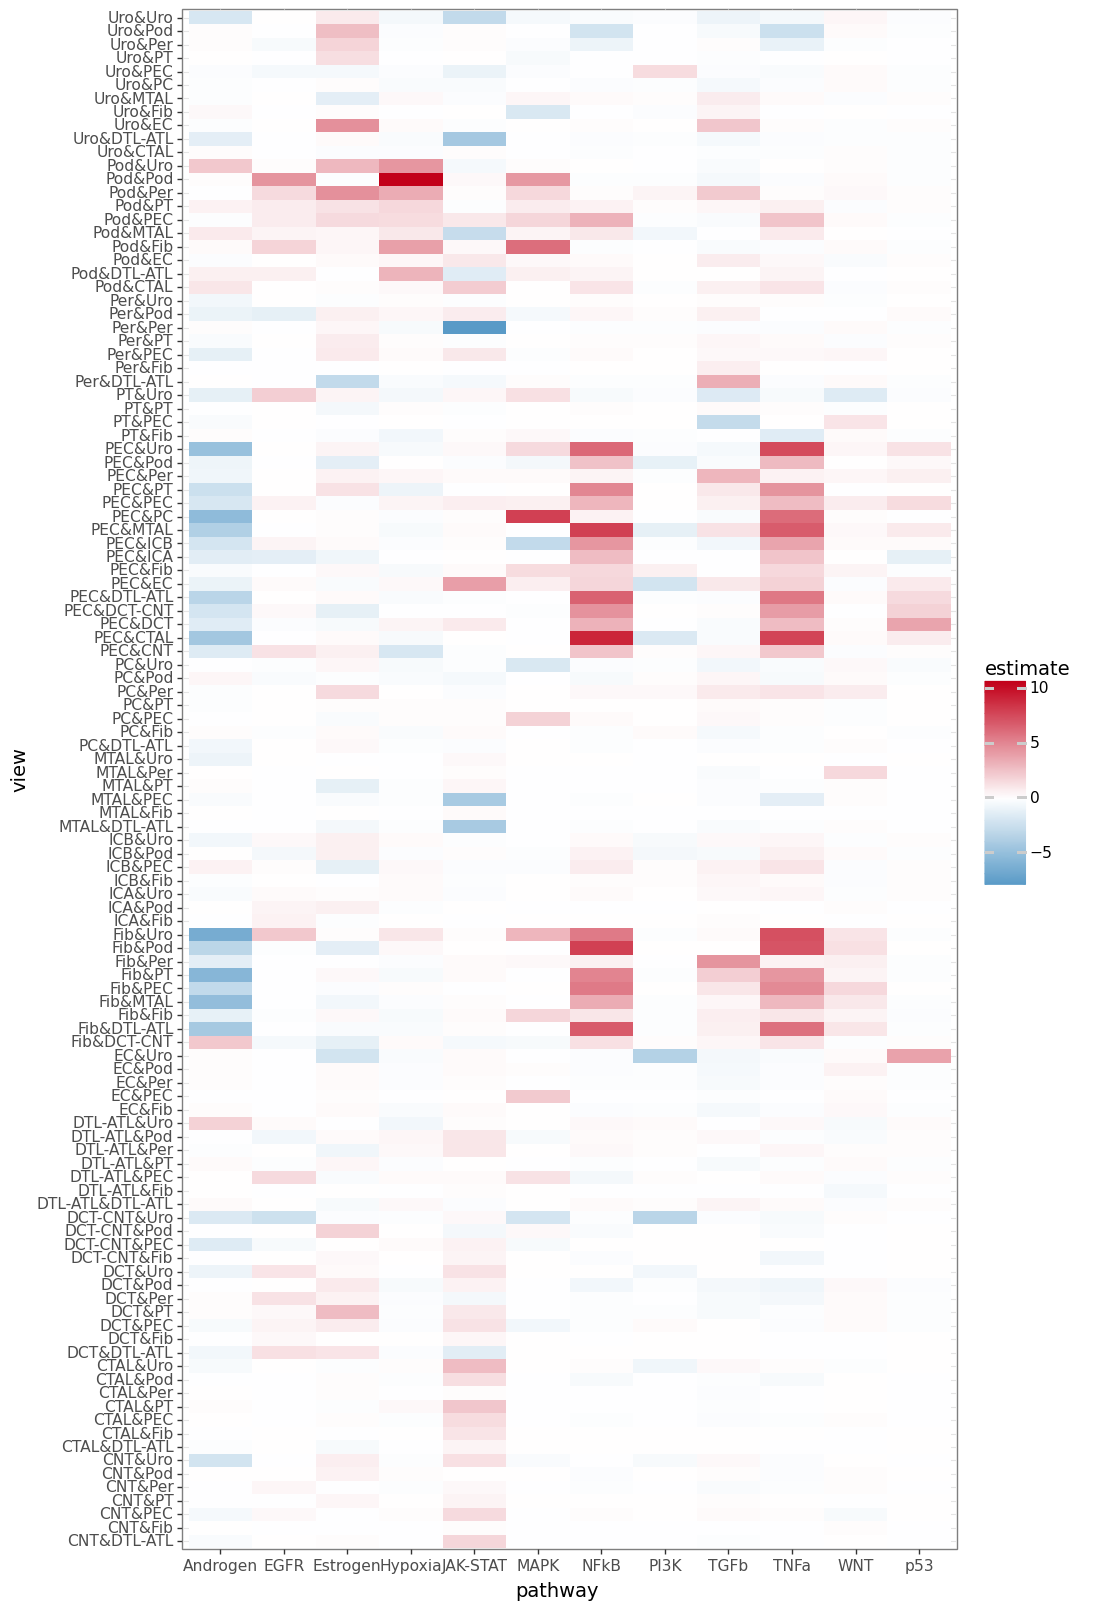

<ggplot: (8783440023970)>

In [40]:
## p9 tile plot
(p9.ggplot(estimate) +
 p9.aes(x='pathway', y='view') +
 p9.geom_tile(p9.aes(fill='estimate')) +
 p9.scale_fill_gradient2(low='#1f77b4', high='#c20019') +
 p9.theme_bw(base_size=14) +
 p9.theme(figure_size=(10, 20))
)


In [ ]:
model.close()

MSigDB

In [ ]:
msigdb = dc.get_resource('MSigDB')
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

In [ ]:
msigdb = dc.translate_net(msigdb, 'genesymbol')

In [ ]:
msigdb.head()

In [ ]:
# generate ligand-receptor geneset
lr_msigdb = li.fun.generate_lr_geneset(lr_pairs, msigdb, lr_separator="^", weight=None, source='geneset', target='genesymbol')
lr_msigdb.head()

In [ ]:
# run pathway enrichment analysis
estimate, pvals =  dc.run_ulm(lr_loadings.transpose(), lr_msigdb,
                              source="geneset", target="interaction",
                              use_raw=False, min_n=5)
# pivot columns to long
estimate = (estimate.
            melt(ignore_index=False, value_name='estimate', var_name='pathway').
            reset_index().
            rename(columns={'index':'view'})
            )

In [ ]:
## p9 tile plot
(p9.ggplot(estimate) +
 p9.aes(x='pathway', y='view') +
 p9.geom_tile(p9.aes(fill='estimate')) +
 p9.scale_fill_gradient2(low='#1f77b4', high='#c20019') +
 p9.theme_bw(base_size=14) +
 p9.theme(figure_size=(10, 20))
)
